In [28]:
library("dplyr")
library("corrplot")
library("corpcor")
library("GPArotation")
library("psych")
library("IDPmisc") 

In [26]:
house <- read.csv('C:/Users/Marcy/Documents/Entity Coursework/Final Project/house.csv')
x <- read.csv("C:/Users/Marcy/Documents/Entity Coursework/Final Project/x.csv")
y <- read.csv("C:/Users/Marcy/Documents/Entity Coursework/Final Project/y.csv")

In [34]:
tail(house)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,...,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition,SalePrice,SalePriceRange
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
2914,160,4,21,1526,1,4,3,5,4,5,...,0,0,0,0,0,0,8,4,NA,
2915,160,4,21,1936,1,4,3,5,4,7,...,0,0,0,0,4,0,8,4,NA,
2916,160,4,21,1894,1,4,4,5,4,5,...,0,0,0,0,4,0,8,0,NA,
2917,20,3,160,20000,1,4,0,2,5,7,...,0,0,0,0,4,0,8,0,NA,
2918,85,3,62,10441,1,4,0,6,5,5,...,0,0,0,0,2,700,8,4,NA,
2919,60,3,74,9627,1,4,0,5,7,5,...,0,0,0,0,4,0,8,4,NA,


#### Create a model that uses SalePrice as the response variable and the other columns as potential predictor variables. Start by creating a function called FitAll that creates a linear model of all predictor variables, which have been recoded. 

In [29]:
FitAll = lm(SalePrice ~ ., data = house)
summary(FitAll)


Call:
lm(formula = SalePrice ~ ., data = house)

Residuals:
    Min      1Q  Median      3Q     Max 
-162899   -8532     259    8395  118125 

Coefficients: (2 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2.938e+05  9.224e+04  -3.186 0.001477 ** 
MSSubClass                  -5.457e+00  2.475e+01  -0.221 0.825503    
MSZoning                    -2.557e+03  8.323e+02  -3.072 0.002168 ** 
LotFrontage                 -2.276e+01  1.489e+01  -1.529 0.126542    
LotArea                      1.530e-01  5.414e-02   2.827 0.004769 ** 
Street                       1.592e+04  7.656e+03   2.080 0.037730 *  
LotConfig                   -3.383e+01  2.944e+02  -0.115 0.908524    
BldgType                    -1.366e+03  8.126e+02  -1.681 0.092954 .  
HouseStyle                  -2.670e+02  3.544e+02  -0.754 0.451227    
OverallQual                  5.344e+03  6.754e+02   7.913 5.09e-15 ***
OverallCond         

#### Features significantly tied to house prices 
#Some of the individual predictors are significant, and they're what you might expect: Overall quality, overall conditin, year built, roofing material, first and second floor square footage, basement full bath, functional, garage cars. Zoning, lot area, Screen porch and sale condition are important to a lesser degree. 
 

#### Hybrid Stepwise - Forward and Backward Selection
#Starting with no predictors, using the mean for HousePrice only.

In [30]:
fitstart = lm(SalePrice~1, data = house)
step(fitstart, direction="both", scope=formula(FitAll))

Start:  AIC=32946.74
SalePrice ~ 1

                 Df  Sum of Sq        RSS   AIC
+ SalePriceRange  7 8.4702e+12 7.3773e+11 29275
+ OverallQual     1 5.7609e+12 3.4470e+12 31514
+ GrLivArea       1 4.6237e+12 4.5842e+12 31930
+ GarageCars      1 3.7764e+12 5.4315e+12 32178
+ ExterQual       1 3.7349e+12 5.4730e+12 32189
+ GarageArea      1 3.5788e+12 5.6291e+12 32230
+ BsmtQual        1 3.5496e+12 5.6583e+12 32238
+ TotalBsmtSF     1 3.4666e+12 5.7413e+12 32259
+ X1stFlrSF       1 3.3798e+12 5.8281e+12 32281
+ KitchenQual     1 3.1965e+12 6.0114e+12 32326
+ FullBath        1 2.8945e+12 6.3135e+12 32398
+ GarageFinish    1 2.7778e+12 6.4301e+12 32425
+ TotRmsAbvGrd    1 2.6230e+12 6.5849e+12 32459
+ YearBuilt       1 2.5176e+12 6.6903e+12 32482
+ YearRemodAdd    1 2.3678e+12 6.8401e+12 32515
+ Fireplaces      1 2.0075e+12 7.2004e+12 32590
+ FireplaceQu     1 1.9451e+12 7.2629e+12 32602
+ GarageType      1 1.5880e+12 7.6199e+12 32672
+ HeatingQC       1 1.4746e+12 7.7333e+12 32694
+ Bs


Call:
lm(formula = SalePrice ~ SalePriceRange + OverallQual + GrLivArea + 
    YearBuilt + OverallCond + GarageCars + FireplaceQu + RoofMatl + 
    BsmtFullBath + BldgType + KitchenQual + LotArea + Functional + 
    GarageType + HeatingQC + ScreenPorch + SaleCondition + MSZoning + 
    GarageYrBlt + KitchenAbvGr + Street + WoodDeckSF + Fireplaces + 
    BsmtQual + X1stFlrSF + BsmtFinType1 + GarageFinish + FullBath + 
    LotFrontage + BsmtHalfBath, data = house)

Coefficients:
                (Intercept)  SalePriceRange100000-150000  
                 -2.571e+05                   -5.608e+04  
SalePriceRange150000-200000    SalePriceRange25000-50000  
                 -3.981e+04                   -1.056e+05  
SalePriceRange300000-400000  SalePriceRange400000-500000  
                  7.761e+04                    1.521e+05  
 SalePriceRange50000-100000         SalePriceRange501000  
                 -7.920e+04                    3.077e+05  
                OverallQual                  

#### The AIC with no predictors at all is 32946.74. Adding anything at all will bring the AIC down, but the second iteration shows that the best way to improve the model is to add OverallQual of the house as a predictor. 
Iterating through each of the independent variables, finally at the end, we achieve an AIC of 29376.69. The predictor variables that most improve the model are SalePriceRange + OverallQual + GrLivArea + YearBuilt + 
    OverallCond + GarageCars + FireplaceQu + RoofMatl + BsmtFullBath + 
    BldgType + KitchenQual + LotArea + Functional + GarageType + 
    HeatingQC + ScreenPorch + SaleCondition + MSZoning + GarageYrBlt + 
    KitchenAbvGr + Street + WoodDeckSF + Fireplaces + BsmtQual + 
    X1stFlrSF + BsmtFinType1 + GarageFinish + FullBath + LotFrontage + 
    BsmtHalfBath




#### This does bring to mind more questions: do the importance of these features to homebuyers in this area hold true for homebuyers in other parts of the country?  Is a pool important to homebuyers across the (diving) board, so to speak? 
Removing the particular neighborhoods listed in this dataset may change the outcome of the regression model. Is it even necessary to remove the neighborhoods for my purposes. But to generalize this across the nation, specific locations or neighborhoods would not be useful. Also, is a heating system as important to homebuyers in Arizona as it would be to those settling down in Michigan? This dataset is located in Iowa, so heating systems are important. In Florida, basements are rare. Would they still boost a home's sale price? 

#### Exploratory Factor Analysis
There are three assumptions: sample size, absence of multicollinearity and some relationship between the independent variables. 

#### I'm not going to subset the data, so I'll go straight to a cor matrix to test for the assumption of the absence of multicollinearity.

In [38]:
subset = subset(house, select = -c(SalePriceRange))
houseCor <- cor(subset)
View(round(houseCor, 2))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,...,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition,SalePrice
MSSubClass,1.00,0.03,-0.23,-0.20,0.00,0.07,0.74,0.39,0.03,-0.07,...,-0.02,-0.02,-0.04,-0.05,0.00,0.09,-0.03,0.03,-0.02,NA
MSZoning,0.03,1.00,-0.03,-0.02,0.09,0.02,-0.03,-0.08,-0.18,0.17,...,-0.18,0.11,0.00,0.01,0.00,-0.08,0.01,0.05,-0.03,NA
LotFrontage,-0.23,-0.03,1.00,0.14,-0.03,0.00,-0.25,-0.06,0.13,-0.04,...,0.09,0.02,0.00,0.04,0.11,0.01,0.00,-0.06,0.02,NA
LotArea,-0.20,-0.02,0.14,1.00,-0.13,-0.12,-0.26,-0.03,0.10,-0.04,...,0.10,0.02,0.02,0.05,0.09,0.03,0.07,0.00,0.02,NA
Street,0.00,0.09,-0.03,-0.13,1.00,0.00,0.00,0.03,0.07,0.02,...,0.01,-0.04,0.01,-0.01,0.00,-0.02,-0.01,0.01,0.02,NA
LotConfig,0.07,0.02,0.00,-0.12,0.00,1.00,0.11,-0.02,-0.04,-0.02,...,-0.06,-0.04,0.00,-0.01,-0.04,0.04,-0.02,-0.01,0.03,NA
BldgType,0.74,-0.03,-0.25,-0.26,0.00,0.11,1.00,0.06,0.08,-0.15,...,-0.03,-0.11,-0.01,-0.04,-0.03,0.13,-0.02,0.00,0.02,NA
HouseStyle,0.39,-0.08,-0.06,-0.03,0.03,-0.02,0.06,1.00,0.21,-0.04,...,0.13,-0.09,-0.03,-0.02,0.05,0.01,-0.02,0.07,0.05,NA
OverallQual,0.03,-0.18,0.13,0.10,0.07,-0.04,0.08,0.21,1.00,-0.09,...,0.30,-0.14,0.02,0.04,0.03,0.17,0.01,-0.02,0.22,NA
OverallCond,-0.07,0.17,-0.04,-0.04,0.02,-0.02,-0.15,-0.04,-0.09,1.00,...,-0.07,0.07,0.04,0.04,-0.02,-0.17,0.03,0.11,0.04,NA


#### look for any correlations that are higher than .9. This would indicate really high multicollinearity, and if there's an item that has a correlation of .9, I  will most likely want to remove that item

#### I don't see any higher than .55  
to doublecheck my findings from the correlation matrix, I'll run a Bartlett's test.

In [39]:
cortest.bartlett(subset)

R was not square, finding R from data



$chisq
[1] 149798.3

$p.value
[1] 0

$df
[1] 2145

#### check determinants, which is another measure of how the variables relate to each other. 

#### Initial pass to determine approximate number of factors. Because I didn't subset, I'm going to try 20 factors. 

In [42]:
pcZ <- principal(subset, nfactors = 20, rotate = "none")
pcZ
#pcZ.loadings.df <- data.frame(pcZ$loading)
#write.csv(pcZ.loadings.df, "ss_loadings.csv")
#write.csv(data.frame(pcZ$loading > 1.0), "loadings_above_one.csv")

Warning message in cor.smooth(r):
"Matrix was not positive definite, smoothing was done"


Principal Components Analysis
Call: principal(r = subset, nfactors = 20, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
                PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
MSSubClass    -0.05  0.26 -0.49  0.38  0.33 -0.21 -0.31 -0.16 -0.02  0.26  0.12
MSZoning      -0.25  0.01  0.20  0.09 -0.07 -0.04 -0.13 -0.01 -0.24  0.36  0.04
LotFrontage    0.20  0.06  0.32 -0.22  0.01  0.06  0.10  0.07  0.06 -0.14 -0.17
LotArea        0.24 -0.04  0.45  0.06  0.03  0.05  0.09  0.14  0.18 -0.14  0.04
Street         0.06  0.01 -0.05  0.06 -0.04 -0.01  0.08 -0.01 -0.18  0.25  0.01
LotConfig     -0.06 -0.01 -0.14 -0.03  0.06  0.00 -0.01 -0.08 -0.06  0.15  0.11
BldgType       0.02 -0.07 -0.56  0.10  0.38 -0.32 -0.20 -0.23 -0.03  0.32  0.19
HouseStyle     0.25  0.27 -0.32  0.54 -0.07  0.06 -0.08  0.03  0.05 -0.17 -0.03
OverallQual    0.84  0.05 -0.07 -0.06  0.01  0.04 -0.08 -0.11 -0.14  0.01  0.02
OverallCond   -0.21 -0.08  0.15  0.16 -0.

#### R has tried to break down the data into 20 factors. On the first pass is the SS loadings on the bottom, which contains the eigenvalues. 
The larger the eigenvalue, the more likely the factor is important. Typically there is a cutoff of 1, so any factors with an eigenvalue > 1 should be examined. 
In this table, all the PC values are greater than 1.  

#### Examine the scree plot for a more visual return of eigenvalues generated by the model. 

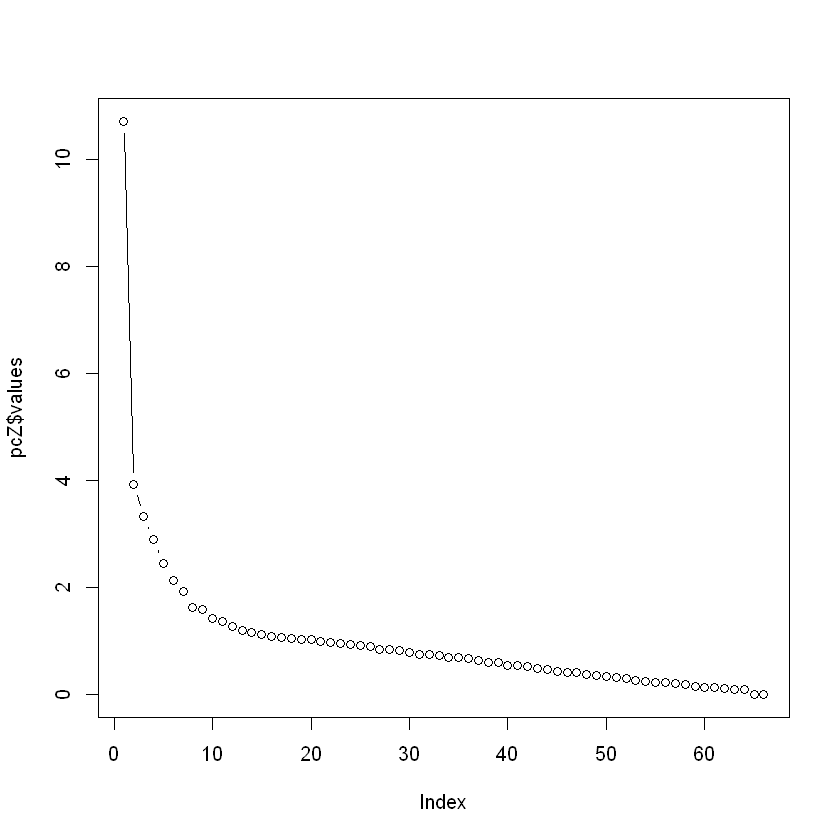

In [43]:
plot(pcZ$values, type="b")

#### There's a sheer dropoff after 10-12 factors, down to 50, where the trendline continues its descent. I'll go with top 20 factors and test that assumption, to see if the model fit improves with 12 factors since that's about where the rest flow together.

In [44]:
pcZ2 <- principal (subset, nfactors = 20, rotate = "none")
pcZ2

Warning message in cor.smooth(r):
"Matrix was not positive definite, smoothing was done"


Principal Components Analysis
Call: principal(r = subset, nfactors = 20, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
                PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
MSSubClass    -0.05  0.26 -0.49  0.38  0.33 -0.21 -0.31 -0.16 -0.02  0.26  0.12
MSZoning      -0.25  0.01  0.20  0.09 -0.07 -0.04 -0.13 -0.01 -0.24  0.36  0.04
LotFrontage    0.20  0.06  0.32 -0.22  0.01  0.06  0.10  0.07  0.06 -0.14 -0.17
LotArea        0.24 -0.04  0.45  0.06  0.03  0.05  0.09  0.14  0.18 -0.14  0.04
Street         0.06  0.01 -0.05  0.06 -0.04 -0.01  0.08 -0.01 -0.18  0.25  0.01
LotConfig     -0.06 -0.01 -0.14 -0.03  0.06  0.00 -0.01 -0.08 -0.06  0.15  0.11
BldgType       0.02 -0.07 -0.56  0.10  0.38 -0.32 -0.20 -0.23 -0.03  0.32  0.19
HouseStyle     0.25  0.27 -0.32  0.54 -0.07  0.06 -0.08  0.03  0.05 -0.17 -0.03
OverallQual    0.84  0.05 -0.07 -0.06  0.01  0.04 -0.08 -0.11 -0.14  0.01  0.02
OverallCond   -0.21 -0.08  0.15  0.16 -0.

#### examining residuals to determine model fit
 The basic idea behind this test is that the model fits your data very well if there is very little difference between the correlation matrix and the loadings generated through your model. The difference between them is known as the residual. A general rule of thumb is that you have good model fit if the percentage of large residuals (over .05) is less than 50%. In order to make all this easier, you will go through a series of steps. The first line creates your residuals, using the factor.residuals() function. The argument it takes are your correlation matrix and the loadings from your most recent factor analysis model.

In [46]:
residuals <- factor.residuals(subset, pcZ2$loadings)
residuals <- as.matrix(residuals[upper.tri(residuals)])
largeResid <- abs(residuals) > .05
sum(largeResid)
sum(largeResid/nrow(residuals))

[1] 1944

[1] 0.9062937

#### 89% of the residuals are large.
This is over 50%, so having 12 factors is a pretty good model fit for the data.

#### Oblique Rotation
Oblimin is the most commonly used type of oblique rotation and I'll keep 12 fators because an examination of the residuals showed that was a good fit for the data. 

In [47]:
pcZ3 <- principal(subset, nfactors=20, rotate = "oblimin")
pcZ3

Warning message in GPFoblq(L, Tmat = Tmat, normalize = normalize, eps = eps, maxit = maxit, :
"convergence not obtained in GPFoblq. 1000 iterations used."
Warning message in cor.smooth(r):
"Matrix was not positive definite, smoothing was done"


Principal Components Analysis
Call: principal(r = subset, nfactors = 20, rotate = "oblimin")
Standardized loadings (pattern matrix) based upon correlation matrix
                TC1   TC2   TC4   TC5  TC10  TC11   TC7   TC3   TC9   TC6   TC8
MSSubClass     0.02  0.11  0.03 -0.02 -0.21  0.03 -0.01  0.86 -0.03 -0.06 -0.03
MSZoning      -0.11  0.11  0.02  0.12  0.14  0.10 -0.07  0.06 -0.35 -0.01 -0.06
LotFrontage    0.34  0.21  0.02  0.01  0.12 -0.16 -0.02 -0.40  0.03  0.00 -0.01
LotArea       -0.12  0.16  0.09  0.03  0.09  0.15 -0.02 -0.29  0.05 -0.03  0.01
Street         0.00  0.10  0.04  0.00  0.05 -0.01 -0.12 -0.01 -0.02  0.01  0.00
LotConfig      0.16  0.04  0.00 -0.03 -0.06 -0.07  0.12  0.08  0.11  0.05  0.04
BldgType       0.05 -0.15  0.00 -0.01  0.13  0.03  0.06  0.90  0.07 -0.07  0.00
HouseStyle     0.09  0.21  0.07  0.02 -0.62 -0.03  0.07  0.17  0.09 -0.06  0.01
OverallQual    0.54  0.13  0.00  0.08  0.02  0.24  0.17  0.07  0.05  0.07 -0.01
OverallCond    0.07 -0.01  0.02  0.01 

#### exporting to take a look at the pattern matrix, highlight the values that load highly (anything above .3-.4 loads on that factor)
#pcZ3 <- write.csv(pcZ3, "C:/Users/Marcy/Documents/Entity Coursework/Final Project/pcZ3.csv")

In [48]:
print.psych(pcZ3, cut = .3, sort = TRUE)

Principal Components Analysis
Call: principal(r = subset, nfactors = 20, rotate = "oblimin")
Standardized loadings (pattern matrix) based upon correlation matrix
              item   TC1   TC2   TC4   TC5  TC10  TC11   TC7   TC3   TC9   TC6
KitchenQual     43 -0.80                                                      
ExterQual       18 -0.78                                                      
BsmtQual        21 -0.65                                                      
YearRemodAdd    12  0.58                                                      
SalePrice       66  0.55                                                      
OverallQual      9  0.54                                                      
HeatingQC       30 -0.53                                                      
BedroomAbvGr    41        0.84                                                
TotRmsAbvGrd    44        0.83                                                
GrLivArea       36        0.69                  

In [52]:
corr_matrix = cor(subset)

In [54]:
#corrplothouse <- corrplot (corr_matrix, type = "upper", order = "hclust", p.mat = corr_matrix, sig.level = .05, insig = "blank")